# DEF FUNCTIONS

Import librerie utili e funzioni create

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def costFunction(X, y, theta, var_lambda) :
  m = y.size
  h = np.dot(X, theta)
  squaredErrors = (h-y)**2
  thetaNoZeros = np.copy(theta)
  thetaNoZeros[0] = 0
  J = (1/(2*m)) * sum(squaredErrors) + var_lambda/(2*m)*sum(thetaNoZeros**2);
  return J

def gradientDescent(X, y, theta, alpha, num_iters, var_lambda) :
  m = y.size
  J_history = np.zeros(num_iters)
  theta_history = np.zeros((num_iters,len(theta)));
  for iter in range(num_iters) :
    h = np.dot(X, theta)
    # theta calcolata con regolarizzazione(Se var_lambda è 0 non c'è regolarizzazione)
    theta = theta*(1-alpha*var_lambda/m) - (alpha/m)*np.dot(np.transpose(X), (h-y))
    J_history[iter] = costFunction(X, y, theta, var_lambda)
    theta_history[iter, :] = theta;
  return theta, J_history, theta_history


def featureNormalize(X) :  
  X_norm = X
  mu = X.mean(0)
  sigma = X.std(0)
  r,c = X.shape
  i = 1
  for i in range(c) :
    X_norm[:, i] = ((X[:,i] - mu[i]) / sigma[i]);
  return X_norm, mu, sigma

# IMPORT DATASET

Dataset scelto: SCUOLA

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gianluca-Di-Stefano/Homework-Sistemi-Intelligenti/main/student-mat.csv')
X = df.iloc[:, 0:32]
y = df["G3"]
m,n = X.shape
print("Dataset importato")

Dataset importato


# PLOT DATA

Donne:  208
Uomini:  187


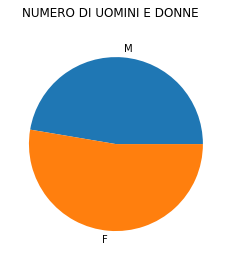

Maggiorenni:  111
MInorenni:  284


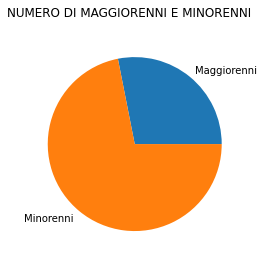

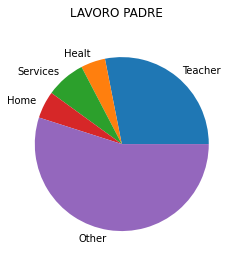

In [98]:
sexColumn = X.loc[:, ["sex"]]
ageColumn = X.loc[:, ["age"]]
fjobColumn = X.loc[:, ["Fjob"]]
num_teacher = int((fjobColumn[fjobColumn["Fjob"] == 4]).count())
num_healt = int((fjobColumn[fjobColumn["Fjob"] == 3]).count())
num_service = int((fjobColumn[fjobColumn["Fjob"] == 2]).count())
num_atHome = int((fjobColumn[fjobColumn["Fjob"] == 1]).count())
num_other = int((fjobColumn[fjobColumn["Fjob"] == 0]).count())
num_donne = int((sexColumn[sexColumn["sex"] == 1]).count())
num_uomini = int(sexColumn.count()) - num_donne
num_maggiorenni = int((ageColumn[ageColumn["age"] >= 18]).count())
num_minorenni = int(ageColumn.count()) - num_maggiorenni
print("Donne: ", num_donne)
print("Uomini: ", num_uomini)
plt.pie([num_uomini, num_donne], labels=["M", "F"])
plt.suptitle('NUMERO DI UOMINI E DONNE')
plt.show()
print("Maggiorenni: ", num_maggiorenni)
print("MInorenni: ", num_minorenni)
plt.pie([num_maggiorenni, num_minorenni], labels=["Maggiorenni", "Minorenni"])
plt.suptitle('NUMERO DI MAGGIORENNI E MINORENNI')
plt.show()
plt.pie([num_teacher, num_healt, num_service, num_atHome, num_other], labels=["Teacher", "Healt", "Services", "Home", "Other"])
plt.suptitle('LAVORO PADRE')
plt.show()

# FEATURES GENERATION (OPZIONALE)

Sezione in cui si possono creare nuove features da aggiungere a quelle già presenti

# FEATURES NORMALIZING

In [14]:
X_numpy = X.to_numpy(dtype=float)
X_numpy, mu, sigma = featureNormalize(X_numpy)
X_numpy = np.insert(X_numpy,0,1, axis=1)
m,n = X_numpy.shape
y_numpy = y.to_numpy(dtype=float)
print("Normalizzazione features...")

Normalizzazione features...


# LEARNING PARAMETERS

In [26]:
alpha = 0.08
iterations = 500
# var_lambda = 0 non utlilizza la REGOLARIZZAZIONE
var_lambda = 0
theta_init = np.zeros(n)
print("Parametri di learning scelti:")
print("Alpha: ", alpha)
print("Iterazioni: ", iterations)
print("Lambda: ", var_lambda)

Parametri di learning scelti:
Alpha:  0.08
Iterazioni:  500
Lambda:  0


# TEST CODE WITH CONVERGENCE GRAPH

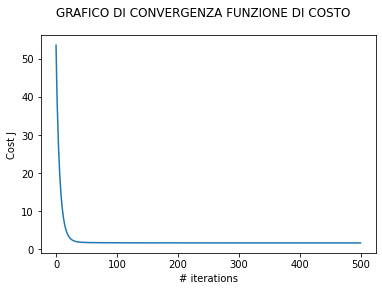

[53.55573921 44.7452449  37.64561324 31.84324701 27.05351935 23.07185681
 19.74551434 16.9568248  14.61291121 12.63911403 10.97461012  9.56936642
  8.38193682  7.37781347  6.52815794  5.80880271  5.19945203  4.683034
  4.2451703   3.87373893  3.55851183  3.29085314  3.06346731  2.87018818
  2.70580206  2.56589905  2.44674805  2.34519135  2.25855593  2.18457851
  2.12134238  2.06722397  2.02084781  1.98104835  1.94683777  1.91737871
  1.89196122  1.86998326  1.85093416  1.8343807   1.81995525  1.80734576
  1.79628731  1.7865549   1.77795737  1.77033229  1.76354154  1.75746766
  1.75201071  1.7470856   1.74261985  1.73855168  1.73482842  1.73140509
  1.7282433   1.72531021  1.72257772  1.72002177  1.71762173  1.71535986
  1.71322094  1.71119184  1.70926124  1.70741937  1.70565776  1.70396907
  1.70234691  1.70078572  1.69928065  1.69782742  1.6964223   1.69506199
  1.69374358  1.69246446  1.69122235  1.69001518  1.6888411   1.68769846
  1.68658574  1.68550159  1.68444476  1.68341412  1.6

In [27]:
theta, J_history ,theta_history = gradientDescent(X_numpy, y_numpy, theta_init, alpha, iterations, var_lambda)
iterations_history = np.arange(iterations);
plt.plot(iterations_history, J_history);
plt.suptitle('GRAFICO DI CONVERGENZA FUNZIONE DI COSTO')
plt.xlabel("# iterations")
plt.ylabel("Cost J")
plt.show()
print(J_history)


# PREDICTIONS

In [36]:
num_esempi = 10
#ESEMPI SCELTI: I PRIMI 10 ESEMPI DEL DATASET
esempi = X_numpy[0:num_esempi, :];
predictions = np.round(np.dot(esempi, theta));
error = (predictions - y[0:num_esempi]).to_numpy()
absError = abs(error)
for i in range(predictions.size) :
  print("-----------------------------------")
  print("Prediction esempio ", i, " : ", predictions[i])
  print("errore: ", error[i])
  print("errore assoluto: ", absError[i])

-----------------------------------
Prediction esempio  0  :  5.0
errore:  -1.0
errore assoluto:  1.0
-----------------------------------
Prediction esempio  1  :  4.0
errore:  -2.0
errore assoluto:  2.0
-----------------------------------
Prediction esempio  2  :  8.0
errore:  -2.0
errore assoluto:  2.0
-----------------------------------
Prediction esempio  3  :  14.0
errore:  -1.0
errore assoluto:  1.0
-----------------------------------
Prediction esempio  4  :  9.0
errore:  -1.0
errore assoluto:  1.0
-----------------------------------
Prediction esempio  5  :  16.0
errore:  1.0
errore assoluto:  1.0
-----------------------------------
Prediction esempio  6  :  12.0
errore:  1.0
errore assoluto:  1.0
-----------------------------------
Prediction esempio  7  :  5.0
errore:  -1.0
errore assoluto:  1.0
-----------------------------------
Prediction esempio  8  :  19.0
errore:  0.0
errore assoluto:  0.0
-----------------------------------
Prediction esempio  9  :  15.0
errore:  0.0
e